In [ ]:
from google.colab import files
uploaded = files.upload()

Saving mbti_2 (1).csv to mbti_2 (1).csv


In [ ]:
import pandas as pd

df = pd.read_csv("/content/mbti_2 (1).csv")


In [ ]:
df.describe()

,type,posts
count,3000,3000
unique,16,3000
top,INFP,"'scored 13, 5w4.|||the phenomenon of men putti..."
freq,637,1


In [ ]:
df['posts'][0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

In [ ]:
df['posts'][1]


"'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you're an ENTP when you...|||http://img188.imageshack.us/img188/6422/6020d1f9da

In [ ]:
df['type'][1]

'ENTP'

In [ ]:
!pip install transformers

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import shutil
import sys

In [ ]:
max_len = 256
train_batch_size = 32
valid_batch_size = 32
epochs = 2
learning_rate = 5e-05


In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
class Custom_dataset(torch.utils.data.Dataset):
  def __init__(self,df,tokenizer,max_len):
    self.df = df
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.title = self.df['posts']
    self.targets = df[target_columns].values

  def __len__(self):
    return len(self.title)

  def __getitem__(self,index):
    title = str(self.title[index])
    title = ' '.join(title.split())

    inputs = self.tokenizer.encode_plus(
          title,
          None,
          add_special_tokens = True,
          max_length = self.max_len,
          padding = 'max_length',
          return_token_type_ids = True,
          truncation = True,
          return_attention_mask = True,
          return_tensors = 'pt'
          )
    target = self.targets[index]

        # Если пришло 16 чисел, берем индекс максимального (где стоит 1)
    if len(target.shape) > 0 and target.size > 1: # проверяет если это список как [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] и его длина большем чем 1 то np.argmax
                                                  # возвращает позицию самого большого, в нашем случае единицы
      target = np.argmax(target)
    return {
          'input_ids': inputs['input_ids'].flatten(),
          'attention_mask':  inputs['attention_mask'].flatten(),
          'token_type_ids':  inputs['token_type_ids'].flatten(),
          'targets': torch.tensor(target, dtype=torch.long)
      }

In [ ]:
df[target_columns].values

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(df[['type']])


encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['type']))


df = pd.concat([df, encoded_df], axis=1)


In [ ]:
df['type'].unique()

array(['INFJ', 'ENTP', 'INTP', 'INTJ', 'ENTJ', 'ENFJ', 'INFP', 'ENFP',
       'ISFP', 'ISTP', 'ISFJ', 'ISTJ', 'ESTP', 'ESFP', 'ESTJ', 'ESFJ'],
      dtype=object)

In [ ]:
target_columns = ['type_INFJ', 'type_ENTP', 'type_INTP', 'type_INTJ', 'type_ENTJ', 'type_ENFJ', 'type_INFP', 'type_ENFP', 'type_ISFP', 'type_ISTP', 'type_ISFJ', 'type_ISTJ', 'type_ESTP', 'type_ESFP', 'type_ESTJ', 'type_ESFJ']
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
2995,INFP,"As an NF myself, I actually enjoy debate becau..."
2996,ISTP,'Ti/Ni can hold you back. If one lives in an o...
2997,INFJ,'Don't get so caught up in a fantacy about you...
2998,ISTP,'Can I please have my account retired? It's ti...


In [ ]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=200)
train_df = train_df.reset_index(drop=True)
valid_df = val_df.reset_index(drop=True)

In [ ]:
train_data_set = Custom_dataset(train_df,tokenizer,max_len)
valid_data_set = Custom_dataset(val_df,tokenizer,max_len)

In [ ]:

batch = next(iter(train_data_set))


for key, value in batch.items():
    print(f"{key}: {value.shape}")

input_ids: torch.Size([256])
attention_mask: torch.Size([256])
token_type_ids: torch.Size([256])
targets: torch.Size([])


In [ ]:
train_data_loader  =  torch.utils.data.DataLoader(
    train_data_set,
    shuffle = True,
    batch_size = train_batch_size,
    num_workers = 0
)
valid_data_loader  =  torch.utils.data.DataLoader(
    train_data_set,
    shuffle = False,
    batch_size = valid_batch_size,
    num_workers = 0
)

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')
print(device)

cuda


In [ ]:
def load_ckp(checkpoint_fpath, model, optimizer):
  checkpoint = torch. load (checkpoint_fpath)
  model.load_state_dict(checkpoint['state _dict'])
  optimizer.load_state_dict(checkpoint['optimizer '])
  valid_loss_min = checkpoint ['valid_ loss_min']
  return model, optimizer, checkpoint ['epoch'], valid_loss_min.item()

def save_ckp(state, is_best, checkpoint_path, best_model_path):
    f_path = checkpoint_path
    torch.save(state, checkpoint_path)
    if is_best:
        best_fpath = best_model_path
        shutil.copyfile(f_path, best_fpath)

In [ ]:
class Bert_Class(nn.Module):
  def __init__(self):
    super(Bert_Class, self).__init__()
    self.bert_model = BertModel.from_pretrained('bert-base-uncased',return_dict = True)
    self.dropout = nn.Dropout(0.3)
    self.linear = nn.Linear(768,16)
  def forward(self,input_ids,attention_mask,token_type_ids):  #берем значит пуллеры размерностью 768 которые указывают характеристику каждого примера, через линейный слой
    output = self.bert_model(input_ids,attention_mask,token_type_ids) #выдаем логиты голосуя к какому классу относится пример, вычисляем лосс функция и повторяем
    output_dropout = self.dropout(output.pooler_output)
    output =  self.linear(output_dropout)
    return output
model = Bert_Class()
model.to(device)



Bert_Class(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementw

In [ ]:

def loss_fn(outputs, targets):
    return nn.CrossEntropyLoss()(outputs, targets)
optimizer = torch.optim.AdamW(params=model.parameters(), lr = learning_rate, eps=1e-8,weight_decay=0.01)

from transformers import get_linear_schedule_with_warmup

total_steps = len(train_data_loader) * 5
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [ ]:
def train_model(n_epochs, training_loader, validation_loader, model, optimizer, checkpoint_path, best_model_path):
    valid_loss_min = np.inf

    for epoch in range(1, n_epochs + 1):
        train_loss = 0
        valid_loss = 0

        print(f'\\n--- Эпоха {epoch} из {n_epochs} ---')


        model.train()
        for index, batch in enumerate(training_loader):
            input_ids = batch['input_ids'].to(device, dtype=torch.long)
            attention_mask = batch['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = batch['token_type_ids'].to(device, dtype=torch.long)
            targets = batch['targets'].to(device, dtype=torch.long)

            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()
            scheduler.step()

            train_loss += loss.item()


            if index % 10 == 0:
                print(f'Батч {index}: Текущий Loss = {loss.item():.4f}')


        model.eval()
        with torch.no_grad():
            for index, batch in enumerate(validation_loader):
                input_ids = batch['input_ids'].to(device, dtype=torch.long)
                attention_mask = batch['attention_mask'].to(device, dtype=torch.long)
                token_type_ids = batch['token_type_ids'].to(device, dtype=torch.long)
                targets = batch['targets'].to(device, dtype=torch.long)

                outputs = model(input_ids, attention_mask, token_type_ids)
                loss = loss_fn(outputs, targets)
                valid_loss += loss.item()


        train_loss = train_loss / len(training_loader)
        valid_loss = valid_loss / len(validation_loader)

        print(f'ИТОГ ЭПОХИ {epoch}: Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}')


        checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
        }

        is_best = valid_loss <= valid_loss_min
        if is_best:
            print(f'!!! Найдена лучшая модель: Valid Loss снизился ({valid_loss_min:.4f} --> {valid_loss:.4f}). Сохраняю...')
            valid_loss_min = valid_loss

        save_ckp(checkpoint, is_best, checkpoint_path, best_model_path)


    print(f'\\nОбучение завершено. Загружаю лучшие веса из {best_model_path}')
    checkpoint = torch.load(best_model_path)
    model.load_state_dict(checkpoint['state_dict'])

    return model

In [ ]:

EPOCHS = 10 # Начни с 3, чтобы проверить, как идет процесс
CHECKPOINT_PATH = "current_checkpoint.pt"
BEST_MODEL_PATH = "best_model.pt"

trained_model = train_model(
    n_epochs=EPOCHS,
    training_loader=train_data_loader ,
    validation_loader=valid_data_loader, # И этот тоже
    model=model,
    optimizer=optimizer,
    checkpoint_path=CHECKPOINT_PATH,
    best_model_path=BEST_MODEL_PATH
)

print("Обучение завершено!")

\n--- Эпоха 1 из 10 ---
Батч 0: Текущий Loss = 2.7965
Батч 10: Текущий Loss = 2.5712
Батч 20: Текущий Loss = 2.3814
Батч 30: Текущий Loss = 2.5044
Батч 40: Текущий Loss = 2.2700
Батч 50: Текущий Loss = 2.4236
Батч 60: Текущий Loss = 2.1555
Батч 70: Текущий Loss = 2.6864
ИТОГ ЭПОХИ 1: Train Loss: 2.3732, Valid Loss: 2.3054
!!! Найдена лучшая модель: Valid Loss снизился (inf --> 2.3054). Сохраняю...
\n--- Эпоха 2 из 10 ---
Батч 0: Текущий Loss = 2.4557
Батч 10: Текущий Loss = 2.3625
Батч 20: Текущий Loss = 2.1610
Батч 30: Текущий Loss = 2.1308
Батч 40: Текущий Loss = 2.3321
Батч 50: Текущий Loss = 2.1178
Батч 60: Текущий Loss = 2.1124
Батч 70: Текущий Loss = 2.2616
ИТОГ ЭПОХИ 2: Train Loss: 2.2395, Valid Loss: 2.0040
!!! Найдена лучшая модель: Valid Loss снизился (2.3054 --> 2.0040). Сохраняю...
\n--- Эпоха 3 из 10 ---
Батч 0: Текущий Loss = 1.9802
Батч 10: Текущий Loss = 1.9481
Батч 20: Текущий Loss = 1.9348
Батч 30: Текущий Loss = 1.8532
Батч 40: Текущий Loss = 1.8593
Батч 50: Текущий 

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


МЕТРИКИ НА ВАЛИДАЦИОННОЙ ВЫБОРКЕ
              precision    recall  f1-score   support

           0       0.78      0.73      0.76       397
           1       0.68      0.58      0.63       213
           2       0.60      0.80      0.69       347
           3       0.64      0.61      0.63       306
           4       0.65      0.25      0.36        52
           5       0.39      0.38      0.39        60
           6       0.65      0.85      0.74       516
           7       0.55      0.61      0.58       183
           8       0.00      0.00      0.00        66
           9       0.52      0.44      0.48        97
          10       0.74      0.29      0.42        48
          11       0.67      0.39      0.49        51
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00        20
          14       0.00      0.00      0.00        12
          15       0.00      0.00      0.00        10

    accuracy                           0.64   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


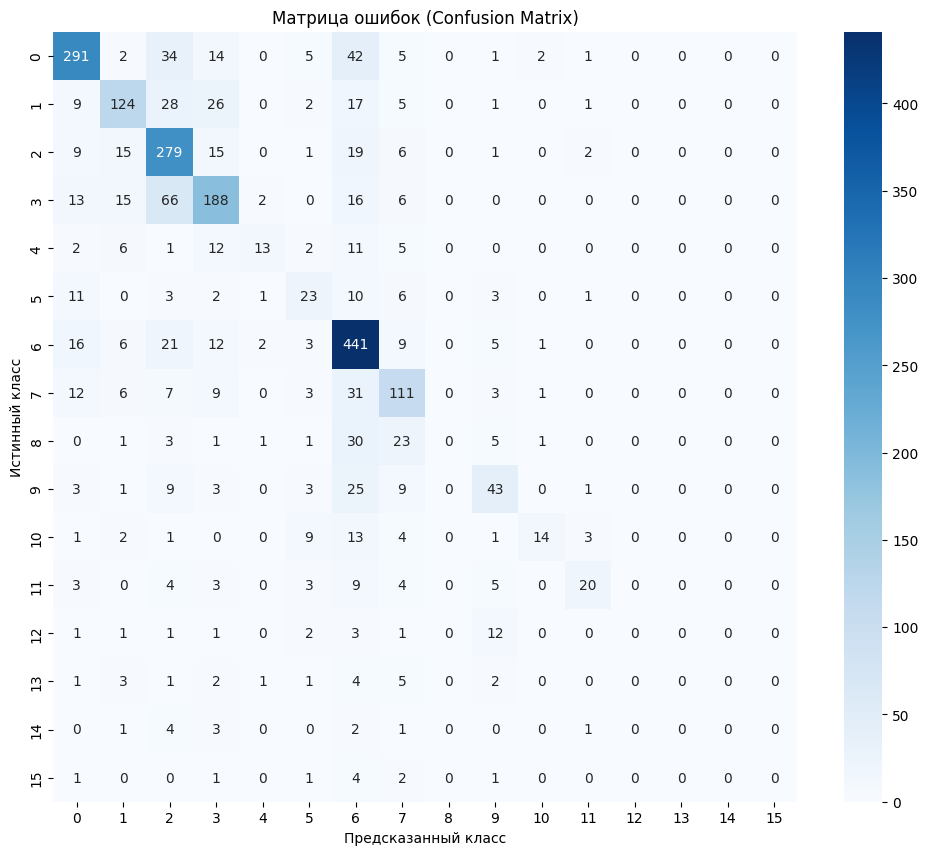

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(data_loader, model, device):
    model.eval()
    all_preds = []
    all_targets = []

    with torch.no_grad():
        for batch in data_loader:
            ids = batch['input_ids'].to(device, dtype=torch.long)
            mask = batch['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = batch['token_type_ids'].to(device, dtype=torch.long)
            targets = batch['targets'].to(device, dtype=torch.long)

            outputs = model(ids, mask, token_type_ids)
            _, preds = torch.max(outputs, dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())

    print("\n" + "="*50)
    print("МЕТРИКИ НА ВАЛИДАЦИОННОЙ ВЫБОРКЕ")
    print("="*50)
    print(classification_report(all_targets, all_preds))

    plt.figure(figsize=(12, 10))
    sns.heatmap(confusion_matrix(all_targets, all_preds), annot=True, fmt='d', cmap='Blues')
    plt.title('Матрица ошибок (Confusion Matrix)')
    plt.xlabel('Предсказанный класс')
    plt.ylabel('Истинный класс')
    plt.show()


evaluate_model(valid_data_loader, model, device)